In [44]:
import pandas as pd

df = pd.read_csv("people.csv")


In [2]:
print(df.isnull().sum())

name             0
city             2
gender           1
age              3
income           2
credit_score     0
loan_approved    0
dtype: int64


In [3]:
# Drop rows with ANY missing value
# df_drop_rows = df.dropna()

# Drop columns with missing values
# df_drop_cols = df.dropna(axis=1)

In [45]:
df.fillna({
    "city": "Unknown",
    "age": int(df["age"].mean()),
    "gender": df["gender"].mode()[0],
    "income": int(df['income'].mean())
}, inplace=True)

print(df)


       name       city  gender   age   income  credit_score  loan_approved
0     Alice      Delhi  Female  25.0  50000.0           720              1
1       Bob     Mumbai    Male  30.0  60000.0           680              0
2   Charlie    Unknown    Male  28.0  55000.0           650              0
3     David    Kolkata    Male  35.0  63644.0           700              1
4       Eva      Delhi  Female  29.0  65000.0           750              1
5     Frank    Chennai  Female  40.0  70000.0           710              1
6     Grace  Bangalore  Female  32.0  72000.0           760              1
7      Hank     Mumbai    Male  31.0  58000.0           640              0
8       Ivy    Kolkata  Female  27.0  52000.0           690              0
9      Jack      Delhi    Male  31.0  61000.0           730              1
10      Kim  Bangalore  Female  26.0  50000.0           670              0
11      Leo    Chennai    Male  33.0  68000.0           720              1
12     Mona      Delhi  F

In [5]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()

le = LabelEncoder()

df_label['gender_encoded'] = le.fit_transform(df['gender'])

print("Label Encoded Data (Gender)")
print(df_label[['name', 'gender', 'gender_encoded']].head())

df_encoded = pd.get_dummies(df_label, columns=['city'])
print("One-Hot Encoded Data (City)")
print(df_encoded.head())




Label Encoded Data (Gender)
      name  gender  gender_encoded
0    Alice  Female               0
1      Bob    Male               1
2  Charlie    Male               1
3    David    Male               1
4      Eva  Female               0
One-Hot Encoded Data (City)
      name  gender   age        income  credit_score  loan_approved  \
0    Alice  Female  25.0  50000.000000           720              1   
1      Bob    Male  30.0  60000.000000           680              0   
2  Charlie    Male  28.0  55000.000000           650              0   
3    David    Male  35.0  63644.444444           700              1   
4      Eva  Female  29.0  65000.000000           750              1   

   gender_encoded  city_Bangalore  city_Chennai  city_Delhi  city_Kolkata  \
0               0           False         False        True         False   
1               1           False         False       False         False   
2               1           False         False       False         False   

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_scaled_ss = df.copy()
scaler = StandardScaler()
# It makes the distribution mean = 0, std = 1.

df_scaled_ss[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])
print("StandardScaler:")
print(df_scaled_ss.head())


df_scaled_mm = df.copy()
scaler = MinMaxScaler()
# scales values to [0, 1]

df_scaled_mm[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])
print("MinMaxScaler:")
print(df_scaled_mm.head())


StandardScaler:
      name     city  gender       age    income  credit_score  loan_approved
0    Alice    Delhi  Female -1.600316 -1.800772           720              1
1      Bob   Mumbai    Male -0.280757 -0.480988           680              0
2  Charlie  Unknown    Male -0.808581 -1.140880           650              0
3    David  Kolkata    Male  1.038801  0.000000           700              1
4      Eva    Delhi  Female -0.544669  0.178904           750              1
MinMaxScaler:
      name     city  gender     age    income  credit_score  loan_approved
0    Alice    Delhi  Female  0.0625  0.062500           720              1
1      Bob   Mumbai    Male  0.3750  0.375000           680              0
2  Charlie  Unknown    Male  0.2500  0.218750           650              0
3    David  Kolkata    Male  0.6875  0.488889           700              1
4      Eva    Delhi  Female  0.3125  0.531250           750              1


In [7]:
from sklearn.model_selection import train_test_split

df_split = df.copy()
X = df_split[['age']]
y = df_split[['income']]

# 80 - 20 Spliting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data")
print(X_train.head())
# print("Testing Output")
# print(y_train.head())
print("Test Data")
print(X_test.head())
# print("Test Output")
# print(y_test.head())



Training Data
     age
8   27.0
3   35.0
6   32.0
40  32.0
33  36.0
Test Data
     age
27  31.0
39  28.0
26  28.0
43  35.0
24  31.0


predicted_income :  [68791.52478244] for age 34


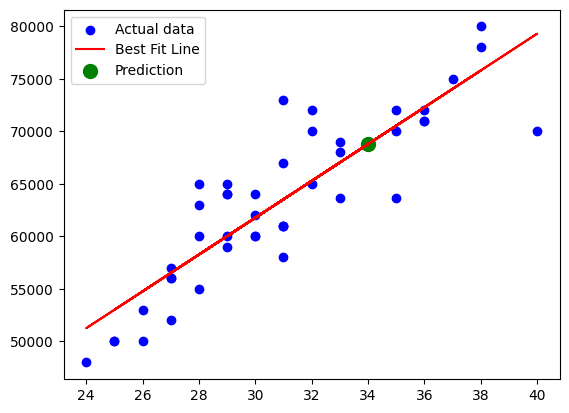

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df_lr = df.copy()

X = df_lr[['age']]
y = df_lr['income']

plt.scatter(X, y, color = "blue", label = "Actual data")

model = LinearRegression()
model.fit(X, y)

predict_age = pd.DataFrame([[34]], columns=X.columns)
predicted_income = model.predict(predict_age)

print("predicted_income : ", predicted_income, "for age 34")

plt.plot(X, model.predict(X), color="red", label="Best Fit Line")

plt.scatter(predict_age, predicted_income, color="green", label="Prediction", s = 100)


plt.legend()
plt.show()


predicted_loan: [1] for credit_score: 730


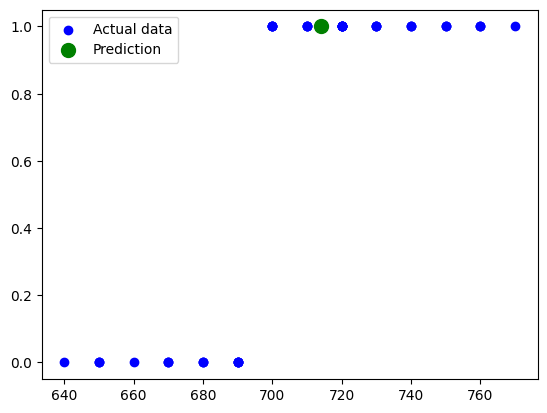

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np

df_lr = df.copy()

X = df_lr[['credit_score']]
y = df_lr['loan_approved']

model = LogisticRegression()

model.fit(X,y)

plt.scatter(X, y, color = "blue", label = "Actual data")

predict_credit = pd.DataFrame([[714]], columns=X.columns)
predicted_loan = model.predict(predict_credit)
print("predicted_loan:", predicted_loan, "for credit_score: 730")

plt.scatter(predict_credit, predicted_loan, color="green", label="Prediction", s = 100)

plt.legend()
plt.show()



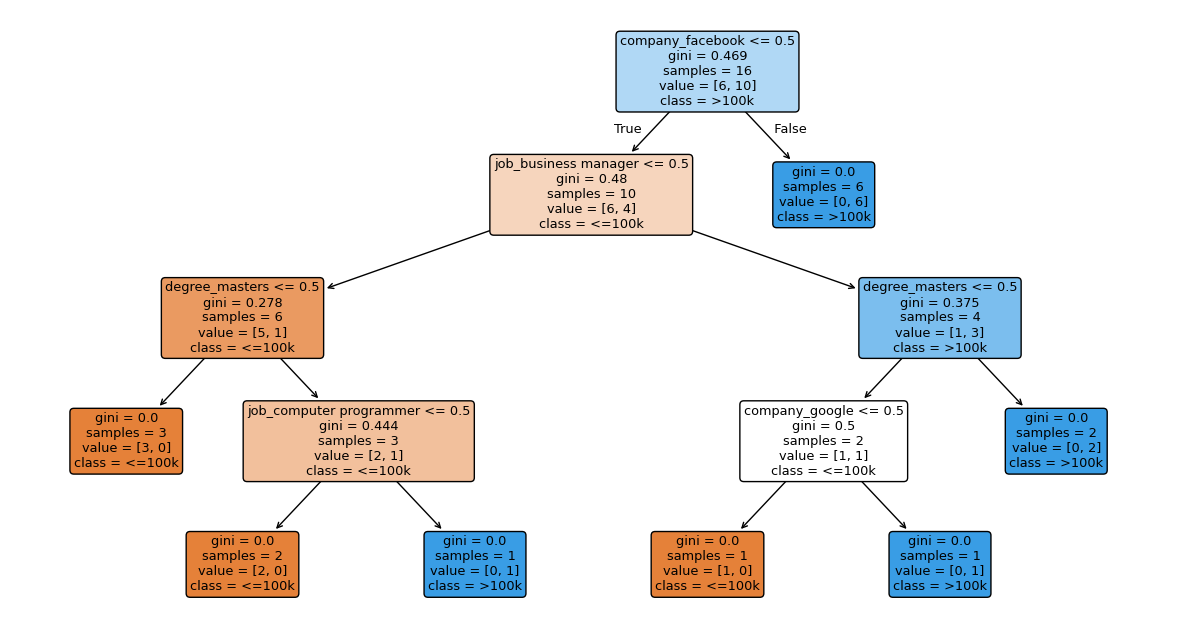

In [10]:
df_sal = pd.read_csv("salaries.csv")

X = df_sal.drop("salary_more_then_100k", axis=1)
y = df_sal["salary_more_then_100k"]

# One-hot encode categorical columns
X = pd.get_dummies(X)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(X, y)

plt.figure(figsize=(15,8))
plot_tree(model, feature_names=X.columns, class_names=["<=100k", ">100k"], 
          filled=True, rounded=True)
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

X = df_sal.drop("salary_more_then_100k", axis=1)
y = df_sal["salary_more_then_100k"]

le = LabelEncoder()
X['company_n'] = le.fit_transform(X["company"]) 
X['job_n'] = le.fit_transform(X["job"]) 
X['degree_n'] = le.fit_transform(X["degree"])

X = X.drop(['company', "job", "degree"], axis='columns')

print(X.head())

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X,y)

score= model.score(X,y)
prediction = model.predict([[2,2,0]])

print("Prediction:", prediction)
print("Score:", score)



   company_n  job_n  degree_n
0          2      2         0
1          2      2         1
2          2      0         0
3          2      0         1
4          2      1         0
Prediction: [0]
Score: 0.875


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

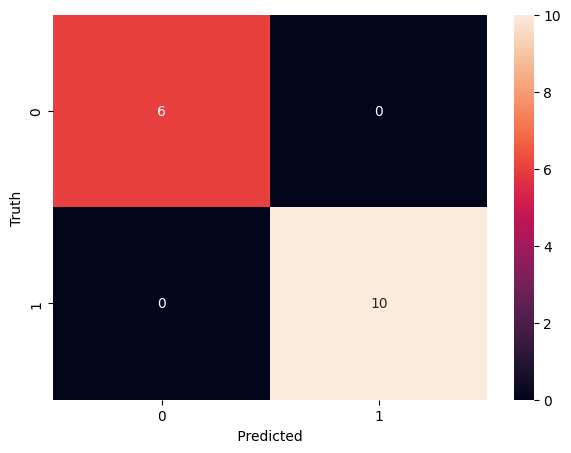

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,y)  #first is actual values, second is predicted values

import seaborn as sn
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel( ' Predicted ' )
plt.ylabel( 'Truth' )

In [13]:
#Naive Bayes

df_spam = pd.read_csv("spam.csv")

df_spam['spam'] = le.fit_transform(df_spam.Category)

X = df_spam.Message
y = df_spam.spam

X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

# print(X_train_count.toarray())


from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
print(model.predict(emails_count))


X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)



[0 1]


0.9842067480258435

In [14]:
#random forest
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data   # features (sepal length, petal length, etc.)
y = iris.target # labels (setosa, versicolor, virginica)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  #no of trees = 100

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Try predicting one sample
sample = [[5.1, 3.5, 1.4, 0.2]]  # sepal length, width, etc.
print("Prediction for sample:", model.predict(sample))


Accuracy: 1.0
Prediction for sample: [0]


In [ ]:
#k fold cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)


In [ ]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=3) 
kf


# Kfold folds the data into n splits and uses them for training and testing purposes
# it ensures better accuracy for our data

# Does NOT guarantee that each fold has all classes in the same proportion.

# Example: You have 3 classes (A, B, C). One fold might miss class C entirely.

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)
    
# these are the partitions it created

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [21]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [26]:
from sklearn.model_selection import StratifiedKFold

# KFold doesnt ensure all categories in each fold, eg it might have only the two categories in training and testing has 3
# but stratiiedFold ensure all the categories lies in each fold

# Ensures each fold preserves the class distribution of the whole dataset.

# Example: If your dataset is 50% A, 30% B, 20% C, each fold will have roughly the same proportions.

folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
    
    
print("scores_logistic",scores_logistic)
print("scores_svm",scores_svm)
print("scores_rf",scores_rf)

scores_logistic [0.8948247078464107, 0.9532554257095158, 0.9098497495826378]
scores_svm [0.3806343906510851, 0.41068447412353926, 0.5125208681135225]
scores_rf [0.9415692821368948, 0.9432387312186978, 0.9165275459098498]


In [ ]:
# instead of doing this manually we can do this using cross val score
# we can see similar results

from sklearn.model_selection import cross_val_score
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

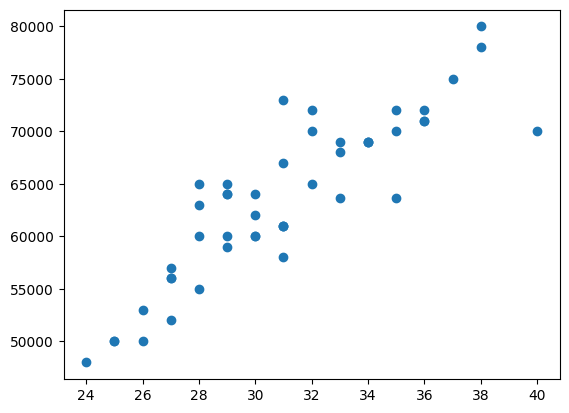

In [47]:
#kmeans clustering

df_k = df.copy()

plt.scatter(df_k.age, df_k.income)


In [48]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)



In [56]:
y = km.fit_predict(df_k[['age', 'income']])
y

array([2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       2, 0, 0], dtype=int32)

In [57]:
df_k['cluster'] = y
km.cluster_centers_

array([[3.47222222e+01, 7.13888889e+04],
       [3.01578947e+01, 6.20677895e+04],
       [2.62000000e+01, 5.27000000e+04]])

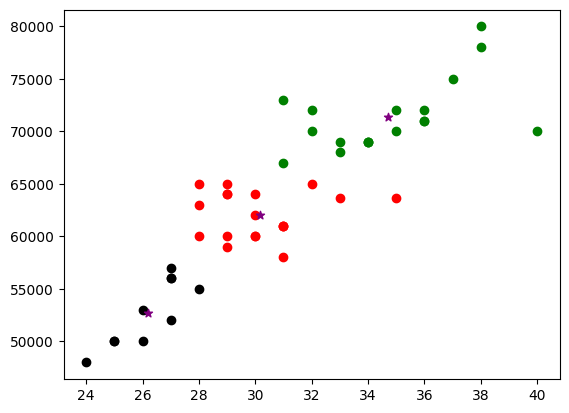

In [58]:
df1 = df_k[df_k['cluster'] == 0]
df2 = df_k[df_k['cluster'] == 1]
df3 = df_k[df_k['cluster'] == 2]

plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [ ]:
# to predict / see the number of clusters or the value of k:
# elbow technique

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_k[['age','income']])
    sse.append(km.inertia_)
    
#inertia_ = how well the data fits into the clusters
# it gives the sum of squared distances of each point to its nearest cluster center or how tight/compact the clusters are

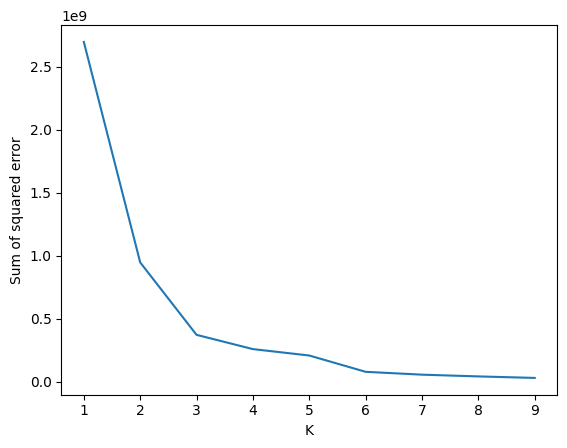

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#we can se kinda that the elbow is at 3 - 4 which is telling us that there might be 3 -4 clusters in the data